In [30]:
%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from mpl_toolkits import mplot3d
from math import cos, sin, pi
from statistics import mean
import os.path

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 200

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(40))
    model.add(Activation('relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(6))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [31]:
SP = np.genfromtxt('DATA/DATA2X.txt')
SH = np.genfromtxt('DATA/DATA2Y.txt')

In [32]:
SP.shape

(7, 200)

In [33]:
for i in range(3, 50):
    if os.path.exists('DATA/DATA'+str(i)+'X.txt'):
        tmp = np.genfromtxt('DATA/DATA'+str(i)+'X.txt')
        print(i, len(tmp))
        SP = np.concatenate((SP, tmp))
        tmp = np.genfromtxt('DATA/DATA'+str(i)+'Y.txt')
        print(i, len(tmp))
        SH = np.concatenate((SH, tmp))
print('Total # of data: ' + str(len(SP)))

3 6
3 6
4 12
4 12
5 5
5 5
9 5
9 5
10 14
10 14
14 36
14 36
17 5
17 5
18 13
18 13
19 12
19 12
21 13
21 13
22 36
22 36
33 5
33 5
34 14
34 14
35 14
35 14
36 21
36 21
37 13
37 13
38 32
38 32
39 12
39 12
41 13
41 13
42 33
42 33
43 28
43 28
45 27
45 27
49 13
49 13
Total # of data: 389


In [34]:
DATA = np.append(SP, SH, axis = 1)
np.random.shuffle(DATA)

X = DATA[:, :200]
Y = DATA[:,200:]

train_size = int(len(DATA) * 0.8)

train_X = X[0:train_size, :]
train_Y = Y[0:train_size, :]
test_X = X[train_size:, :]
test_Y = Y[train_size:, :]

Train on 311 samples, validate on 78 samples
Epoch 1/500
 - 4s - loss: 0.0342 - acc: 0.0900 - val_loss: 0.0164 - val_acc: 0.1026
Epoch 2/500
 - 0s - loss: 0.0155 - acc: 0.0900 - val_loss: 0.0141 - val_acc: 0.1026
Epoch 3/500
 - 0s - loss: 0.0142 - acc: 0.0932 - val_loss: 0.0134 - val_acc: 0.1026
Epoch 4/500
 - 0s - loss: 0.0140 - acc: 0.0932 - val_loss: 0.0134 - val_acc: 0.1026
Epoch 5/500
 - 0s - loss: 0.0133 - acc: 0.1093 - val_loss: 0.0132 - val_acc: 0.0897
Epoch 6/500
 - 0s - loss: 0.0132 - acc: 0.1383 - val_loss: 0.0130 - val_acc: 0.3205
Epoch 7/500
 - 0s - loss: 0.0117 - acc: 0.1994 - val_loss: 0.0125 - val_acc: 0.0897
Epoch 8/500
 - 0s - loss: 0.0113 - acc: 0.1254 - val_loss: 0.0138 - val_acc: 0.1154
Epoch 9/500
 - 0s - loss: 0.0112 - acc: 0.1415 - val_loss: 0.0126 - val_acc: 0.2692
Epoch 10/500
 - 0s - loss: 0.0105 - acc: 0.2283 - val_loss: 0.0132 - val_acc: 0.1026
Epoch 11/500
 - 0s - loss: 0.0101 - acc: 0.1415 - val_loss: 0.0103 - val_acc: 0.1923
Epoch 12/500
 - 0s - loss: 0.

Epoch 97/500
 - 0s - loss: 0.0032 - acc: 0.2476 - val_loss: 0.0063 - val_acc: 0.2308
Epoch 98/500
 - 0s - loss: 0.0032 - acc: 0.2379 - val_loss: 0.0061 - val_acc: 0.2564
Epoch 99/500
 - 0s - loss: 0.0034 - acc: 0.1994 - val_loss: 0.0067 - val_acc: 0.2179
Epoch 100/500
 - 0s - loss: 0.0034 - acc: 0.2540 - val_loss: 0.0059 - val_acc: 0.1795
Epoch 101/500
 - 0s - loss: 0.0029 - acc: 0.2283 - val_loss: 0.0061 - val_acc: 0.2821
Epoch 102/500
 - 0s - loss: 0.0028 - acc: 0.2669 - val_loss: 0.0064 - val_acc: 0.1410
Epoch 103/500
 - 0s - loss: 0.0029 - acc: 0.2026 - val_loss: 0.0061 - val_acc: 0.1410
Epoch 104/500
 - 0s - loss: 0.0035 - acc: 0.2251 - val_loss: 0.0059 - val_acc: 0.1795
Epoch 105/500
 - 0s - loss: 0.0031 - acc: 0.2219 - val_loss: 0.0058 - val_acc: 0.2692
Epoch 106/500
 - 0s - loss: 0.0034 - acc: 0.1801 - val_loss: 0.0061 - val_acc: 0.1282
Epoch 107/500
 - 0s - loss: 0.0030 - acc: 0.2090 - val_loss: 0.0060 - val_acc: 0.3077
Epoch 108/500
 - 0s - loss: 0.0029 - acc: 0.2444 - val_lo

Epoch 193/500
 - 0s - loss: 0.0025 - acc: 0.2733 - val_loss: 0.0068 - val_acc: 0.1154
Epoch 194/500
 - 0s - loss: 0.0030 - acc: 0.2412 - val_loss: 0.0069 - val_acc: 0.1410
Epoch 195/500
 - 0s - loss: 0.0029 - acc: 0.2186 - val_loss: 0.0078 - val_acc: 0.1154
Epoch 196/500
 - 0s - loss: 0.0051 - acc: 0.3215 - val_loss: 0.0079 - val_acc: 0.2949
Epoch 197/500
 - 0s - loss: 0.0035 - acc: 0.2315 - val_loss: 0.0068 - val_acc: 0.2692
Epoch 198/500
 - 0s - loss: 0.0026 - acc: 0.2508 - val_loss: 0.0069 - val_acc: 0.1410
Epoch 199/500
 - 0s - loss: 0.0025 - acc: 0.2379 - val_loss: 0.0066 - val_acc: 0.1410
Epoch 200/500
 - 0s - loss: 0.0026 - acc: 0.2379 - val_loss: 0.0067 - val_acc: 0.1538
Epoch 201/500
 - 0s - loss: 0.0027 - acc: 0.2476 - val_loss: 0.0070 - val_acc: 0.1923
Epoch 202/500
 - 0s - loss: 0.0027 - acc: 0.2251 - val_loss: 0.0084 - val_acc: 0.1923
Epoch 203/500
 - 0s - loss: 0.0029 - acc: 0.3569 - val_loss: 0.0069 - val_acc: 0.2179
Epoch 204/500
 - 0s - loss: 0.0025 - acc: 0.2701 - val

Epoch 289/500
 - 0s - loss: 0.0022 - acc: 0.2508 - val_loss: 0.0060 - val_acc: 0.1410
Epoch 290/500
 - 0s - loss: 0.0021 - acc: 0.2797 - val_loss: 0.0059 - val_acc: 0.1282
Epoch 291/500
 - 0s - loss: 0.0029 - acc: 0.2637 - val_loss: 0.0058 - val_acc: 0.1667
Epoch 292/500
 - 0s - loss: 0.0021 - acc: 0.2412 - val_loss: 0.0061 - val_acc: 0.2564
Epoch 293/500
 - 0s - loss: 0.0023 - acc: 0.2733 - val_loss: 0.0066 - val_acc: 0.1410
Epoch 294/500
 - 0s - loss: 0.0023 - acc: 0.2476 - val_loss: 0.0065 - val_acc: 0.1410
Epoch 295/500
 - 0s - loss: 0.0024 - acc: 0.2444 - val_loss: 0.0057 - val_acc: 0.1282
Epoch 296/500
 - 0s - loss: 0.0021 - acc: 0.2765 - val_loss: 0.0061 - val_acc: 0.1026
Epoch 297/500
 - 0s - loss: 0.0023 - acc: 0.2186 - val_loss: 0.0059 - val_acc: 0.1282
Epoch 298/500
 - 0s - loss: 0.0023 - acc: 0.2508 - val_loss: 0.0065 - val_acc: 0.1154
Epoch 299/500
 - 0s - loss: 0.0021 - acc: 0.2605 - val_loss: 0.0060 - val_acc: 0.1154
Epoch 300/500
 - 0s - loss: 0.0021 - acc: 0.3183 - val

Epoch 385/500
 - 0s - loss: 0.0021 - acc: 0.3087 - val_loss: 0.0057 - val_acc: 0.1026
Epoch 386/500
 - 0s - loss: 0.0021 - acc: 0.2540 - val_loss: 0.0057 - val_acc: 0.1154
Epoch 387/500
 - 0s - loss: 0.0020 - acc: 0.2540 - val_loss: 0.0057 - val_acc: 0.1538
Epoch 388/500
 - 0s - loss: 0.0020 - acc: 0.3473 - val_loss: 0.0062 - val_acc: 0.1154
Epoch 389/500
 - 0s - loss: 0.0029 - acc: 0.2605 - val_loss: 0.0059 - val_acc: 0.1795
Epoch 390/500
 - 0s - loss: 0.0023 - acc: 0.2412 - val_loss: 0.0059 - val_acc: 0.1282
Epoch 391/500
 - 0s - loss: 0.0021 - acc: 0.2733 - val_loss: 0.0058 - val_acc: 0.1410
Epoch 392/500
 - 0s - loss: 0.0021 - acc: 0.2540 - val_loss: 0.0059 - val_acc: 0.1410
Epoch 393/500
 - 0s - loss: 0.0023 - acc: 0.2186 - val_loss: 0.0059 - val_acc: 0.1410
Epoch 394/500
 - 0s - loss: 0.0023 - acc: 0.3151 - val_loss: 0.0069 - val_acc: 0.1154
Epoch 395/500
 - 0s - loss: 0.0036 - acc: 0.2444 - val_loss: 0.0063 - val_acc: 0.2436
Epoch 396/500
 - 0s - loss: 0.0030 - acc: 0.2669 - val

Epoch 481/500
 - 0s - loss: 0.0021 - acc: 0.2669 - val_loss: 0.0057 - val_acc: 0.2949
Epoch 482/500
 - 0s - loss: 0.0021 - acc: 0.3344 - val_loss: 0.0058 - val_acc: 0.2308
Epoch 483/500
 - 0s - loss: 0.0022 - acc: 0.2669 - val_loss: 0.0056 - val_acc: 0.2179
Epoch 484/500
 - 0s - loss: 0.0028 - acc: 0.2540 - val_loss: 0.0054 - val_acc: 0.2692
Epoch 485/500
 - 0s - loss: 0.0025 - acc: 0.2733 - val_loss: 0.0054 - val_acc: 0.1282
Epoch 486/500
 - 0s - loss: 0.0020 - acc: 0.3023 - val_loss: 0.0056 - val_acc: 0.2179
Epoch 487/500
 - 0s - loss: 0.0021 - acc: 0.2572 - val_loss: 0.0054 - val_acc: 0.2436
Epoch 488/500
 - 0s - loss: 0.0019 - acc: 0.2830 - val_loss: 0.0058 - val_acc: 0.2051
Epoch 489/500
 - 0s - loss: 0.0020 - acc: 0.3248 - val_loss: 0.0059 - val_acc: 0.2564
Epoch 490/500
 - 0s - loss: 0.0020 - acc: 0.3087 - val_loss: 0.0055 - val_acc: 0.2692
Epoch 491/500
 - 0s - loss: 0.0019 - acc: 0.3441 - val_loss: 0.0063 - val_acc: 0.2051
Epoch 492/500
 - 0s - loss: 0.0021 - acc: 0.2669 - val

<IPython.core.display.Javascript object>


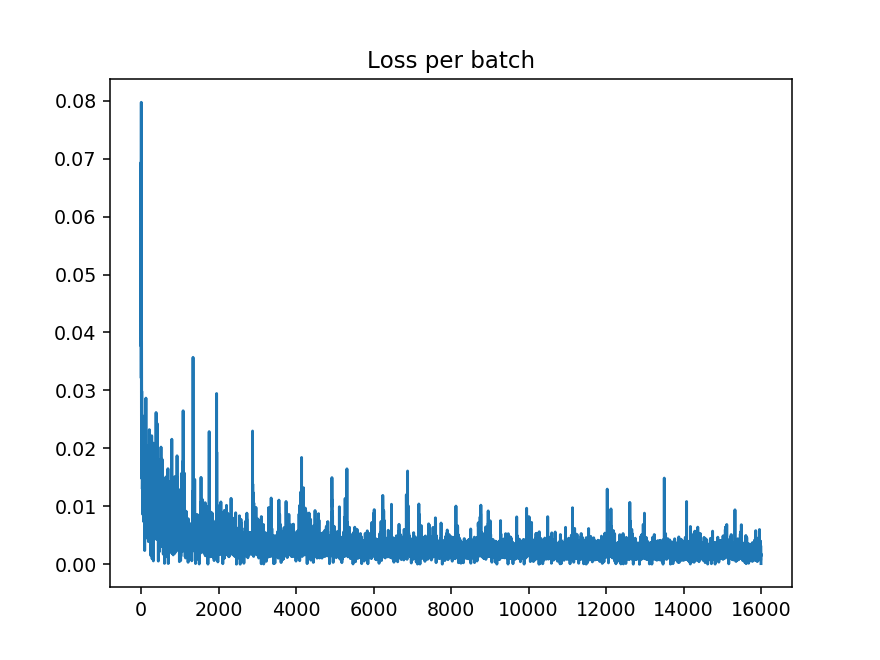

In [35]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_X, train_Y, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_X, test_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=20)
print(score)
plot_losses(history.losses)

In [36]:
train_X[0].shape

(200,)

In [39]:
model.predict(np.reshape(test_X[0], (1, 200)))

array([[0.14291796, 0.13878718, 0.14108998, 0.14678332, 0.14327656,
        0.14059259]], dtype=float32)

In [40]:
test_Y[0]

array([0.09876883, 0.1       , 0.13169178, 0.2       , 0.19258231,
       0.1902113 ])

In [41]:
np.savetxt('Prediction/2019_7_15_1', test_Y[0])